<a href="https://colab.research.google.com/github/legendary-beast/Python-Programs/blob/main/Random_Forest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# x,y  = make_classification(n_samples=1000,n_features=4,
#                            n_informative=2,n_redundant=0,
#                            random_state=0, shuffle=False
#                            )
# clf = RandomForestClassifier(max_depth=2,random_state=0)
# clf.fit(x,y)

# print(clf.predict([[0,0,0,0]]))

[1]


In [29]:
heart = pd.read_csv('heart_failure.csv')

In [30]:
heart.isnull().sum().sum()

0

In [31]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [35]:
x = heart.drop(columns=['DEATH_EVENT'])
y = heart['DEATH_EVENT']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [89]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=5)

params = {
    'max_depth': (1,15),
    'min_samples_leaf': (1,4),
    'min_samples_split': (2,10),
    'n_estimators': (1,50),
    'min_impurity_decrease':(0.1,1.0)
}

random_search = RandomizedSearchCV(rf, params)
random_search.fit(x_train, y_train)

random_search.best_params_,
random_search.best_estimator_


RandomForestClassifier(max_depth=15, min_impurity_decrease=0.1, n_estimators=1,
                       random_state=5)

In [90]:
rf = RandomForestClassifier(max_depth=15, min_impurity_decrease=0.1,
                            n_estimators=1,random_state=5)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_impurity_decrease=0.1, n_estimators=1,
                       random_state=5)

In [92]:
rf.score(x_test,y_test)

0.856

In [93]:
y_pred = rf.predict(x_test)

Text(95.72222222222221, 0.5, 'Truth')

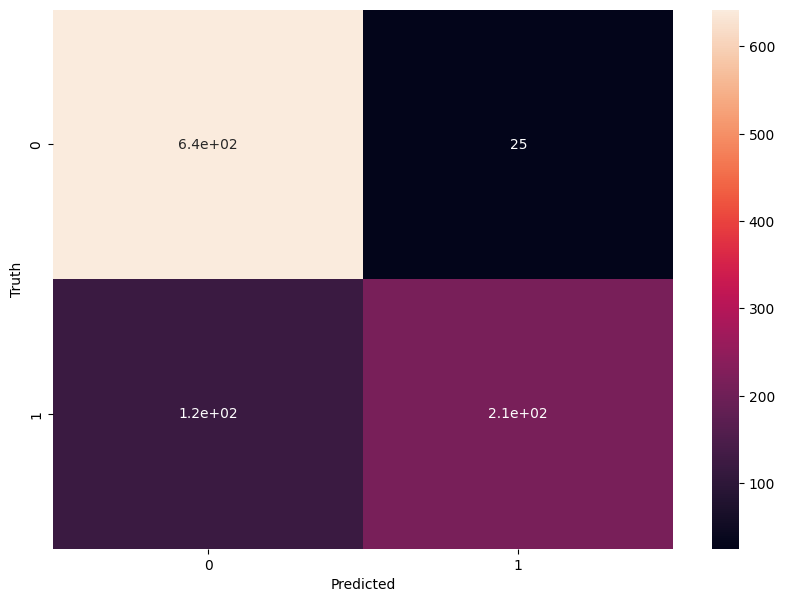

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#####################################################################################

In [60]:
from sklearn.ensemble import AdaBoostClassifier
# adb = AdaBoostClassifier(n_estimators = 100,algorithm="SAMME",random_state=10) #89%
adb = AdaBoostClassifier(n_estimators = 200,algorithm="SAMME",random_state=10) #90 %
adb = AdaBoostClassifier(n_estimators = 10,algorithm="SAMME",random_state=0) #88 %


adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=10, random_state=0)

In [61]:
adb.score(x_test,y_test)

0.889

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                                  max_depth=1, random_state=0).fit(x_train, y_train) # 96%
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                 max_depth=2, random_state=5).fit(x_train, y_train) # 94%
clf.score(x_test, y_test)

0.944

In [ ]:
####################################################################################

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassi+fier()

xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)


0.992